In [21]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import dtale

In [2]:
base = '../output/'

historical_prices_df = pd.read_csv(base + 'snp_historical_prices.csv')
historical_prices_df = historical_prices_df.drop(columns='Unnamed: 0')
historical_prices_df = historical_prices_df.drop(columns='Company')
historical_prices_df

,Symbol,Q3 Date,Q3 Price,Q2 Date,Q2 Price,Q1 Date,Q1 Price
0,WAB,2020-06-30,57.4712,2020-03-31,47.9386,2019-12-31,77.3759
1,TTWO,2020-06-30,139.5700,2020-03-31,118.6100,2019-12-31,122.4300
2,CHD,2020-06-30,77.1044,2020-03-31,63.8084,2019-12-31,70.3250
3,MLM,2020-06-30,206.0021,2020-03-31,188.1841,2019-12-31,277.4322
4,EW,2020-06-30,69.1100,2020-03-31,62.8733,2019-12-31,77.7633
...,...,...,...,...,...,...,...
501,TYL,2020-06-30,346.8800,2020-03-31,296.5600,2019-12-31,300.0200
502,BIO,2020-06-30,451.4900,2020-03-31,350.5600,2019-12-31,370.0300
503,WST,2020-06-30,227.0339,2020-03-31,152.0159,2019-12-31,149.9464
504,DPZ,2020-09-06,NaN,2020-06-14,NaN,2020-03-22,NaN


In [3]:
financial_ratios_df = pd.read_csv(base + 's&p_finratios.csv')
financial_ratios_df = financial_ratios_df.drop(columns='Unnamed: 0')
financial_ratios_df

,Symbol,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE,Q1 Date,Q2 Date,Q3 Date
0,MMM,103.165021,60.287913,69.598300,0.096293,0.127328,0.118817,2019-12-31,2020-03-31,2020-06-30
1,AOS,84.339444,117.939760,112.200856,0.054776,0.031987,0.040890,2019-12-31,2020-03-31,2020-06-30
2,ABT,145.714952,247.118970,302.746773,0.033743,0.018664,0.017562,2019-12-31,2020-03-31,2020-06-30
3,ABBV,45.145182,39.608159,-216.466906,-0.342756,-0.405934,-0.050177,2019-12-31,2020-03-31,2020-06-30
4,ABMD,112.618433,207.523380,246.766315,0.066118,0.029844,0.040467,2019-12-31,2020-03-31,2020-06-30
...,...,...,...,...,...,...,...,...,...,...
500,YUM,63.062576,250.930704,128.890820,-0.060878,-0.010086,-0.025407,2019-12-31,2020-03-31,2020-06-30
501,ZBRA,81.610223,112.645850,132.267734,0.091898,0.051534,0.055463,2019-12-31,2020-03-28,2020-06-27
502,ZBH,96.590975,-40.962778,-119.475547,0.025888,-0.042808,-0.017747,2019-12-31,2020-03-31,2020-06-30
503,ZION,49.450866,323.769464,83.890133,0.024888,0.001874,0.008713,2019-12-31,2020-03-31,2020-06-30


In [4]:
financial_growth_df = pd.read_csv(base + 'growth_data_SnP.csv')
#financial_growth_df = financial_growth_df.rename(columns={"Name": "Company"})
financial_growth_df = financial_growth_df.drop(columns='Unnamed: 0')
financial_growth_df = financial_growth_df.drop(columns='Name')
financial_growth_df

,Sector,Symbol,Q1 Rev Growth,Q1 Op Inc Growth,Q1 EPS Growth,Q2 Rev Growth,Q2 Op Inc Growth,Q2 EPS Growth,Q3 Rev Growth,Q3 Op Inc Growth,Q3 EPS Growth
0,Industrials,MMM,0.015017,-0.359025,-0.387556,-0.004438,0.290147,0.336083,-0.111331,0.046302,-0.000347
1,Industrials,AOS,0.031173,0.023936,0.054670,-0.151818,-0.413853,-0.429357,0.042393,0.285081,0.317254
2,Health Care,ABT,0.029470,0.106845,0.094281,-0.070724,-0.390649,-0.462041,-0.051514,-0.155941,-0.050260
3,Health Care,ABBV,0.026536,0.511655,0.482730,-0.009766,-0.089232,-0.005941,0.209537,-0.791285,-1.239304
4,Health Care,ABMD,0.081035,0.167442,4.320548,-0.067360,-0.240638,-0.538217,-0.202305,-0.361486,0.399448
...,...,...,...,...,...,...,...,...,...,...,...
500,Consumer Discretionary,YUM,0.265123,0.137500,0.932233,-0.254427,-0.542125,-0.828255,-0.051465,0.200000,1.481913
501,Information Technology,ZBRA,0.054867,0.016216,0.257473,-0.117450,-0.196809,-0.476518,-0.091255,-0.211921,0.137040
502,Health Care,ZBH,0.123283,0.370220,-0.259309,-0.160841,-2.353919,-2.596342,-0.312647,0.623465,0.594298
503,Financials,ZION,-0.002805,-0.184028,-0.164003,-0.040788,-0.931915,-0.920693,-0.002933,4.125000,3.959842


In [5]:
snp_price_ratio_df = historical_prices_df.merge(financial_ratios_df, how='outer', on=['Symbol', 'Q1 Date', 'Q2 Date', 'Q3 Date'])

snp_price_ratio_df

,Symbol,Q3 Date,Q3 Price,Q2 Date,Q2 Price,Q1 Date,Q1 Price,Q1 P/E,Q2 P/E,Q3 P/E,Q1 ROE,Q2 ROE,Q3 ROE
0,WAB,2020-06-30,57.4712,2020-03-31,47.9386,2019-12-31,77.3759,109.820179,82.217276,125.933436,0.013629,0.011432,0.008816
1,TTWO,2020-06-30,139.5700,2020-03-31,118.6100,2019-12-31,122.4300,85.479994,110.679922,181.282514,0.068126,0.048330,0.033385
2,CHD,2020-06-30,77.1044,2020-03-31,63.8084,2019-12-31,70.3250,121.142478,69.694989,102.141991,0.054127,0.081553,0.063259
3,MLM,2020-06-30,206.0021,2020-03-31,188.1841,2019-12-31,277.4322,132.628429,454.112210,58.979462,0.024482,0.004890,0.039628
4,EW,2020-06-30,69.1100,2020-03-31,62.8733,2019-12-31,77.7633,176.925767,128.561597,-351.672953,0.067546,0.079619,-0.031752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,COTY,2020-06-30,NaN,2020-03-31,NaN,2019-12-31,NaN,-399.820503,-14.454080,-4.452500,-0.004719,-0.072772,-0.255042
509,ETFC,2020-06-30,NaN,2020-03-31,NaN,2019-12-31,NaN,58.870841,41.980099,56.101336,0.026288,0.027765,0.028739
510,HRB,2020-07-31,NaN,2020-04-30,NaN,2020-01-31,NaN,-33.604415,6.843748,30.835003,0.407323,6.480807,0.674608
511,KSS,2020-08-01,NaN,2020-05-02,NaN,2020-02-01,NaN,22.899058,-5.471127,70.442556,0.048624,-0.112944,0.009717


In [6]:
snp_df = snp_price_ratio_df.merge(financial_growth_df, how='outer', on=['Symbol'])

dtale.show(snp_df, ignore_duplicate=True)

In [7]:
clean_snp_df = snp_df.loc[(snp_df['Symbol'] != 'OTIS') & (snp_df['Symbol'] != 'AXP')
                          & (snp_df['Symbol'] != 'CARR')]

clean_snp_df = clean_snp_df.reset_index(drop=True)

# change price to that 12/27/19
clean_snp_df.loc[184, 'Q1 Price'] = 72.449997

# change price to that 3/27/20
clean_snp_df.loc[184, 'Q2 Price'] = 61.935001

# change price to that of 6/26/20
clean_snp_df.loc[184, 'Q3 Price'] = 88.407501

dtale.show(clean_snp_df, ignore_duplicate=True)

In [8]:
clean_snp_df = clean_snp_df.dropna()
clean_snp_df = clean_snp_df.rename(columns={'Symbol': 'Company'})
clean_snp_df = clean_snp_df.reset_index(drop=True)

In [9]:
dtale.show(clean_snp_df)

In [10]:
big_tech_df = clean_snp_df.loc[(clean_snp_df['Company'] == 'FB') | (clean_snp_df['Company'] == 'AMZN') |  
                                      (clean_snp_df['Company'] == 'AAPL') | 
                                      (clean_snp_df['Company'] == 'MSFT') | 
                                      (clean_snp_df['Company'] ==  'NFLX') | 
                                      (clean_snp_df['Company'] == 'GOOG')]

big_tech_df = big_tech_df.reset_index(drop=True)
dtale.show(big_tech_df, ignore_duplicate=True)

##### ANALYSIS ######

In [59]:
clean_nasdaq_df = pd.read_csv(base + 'clean_nasdaq_df.csv')
clean_nasdaq_df = clean_nasdaq_df.drop(columns='Unnamed: 0')
dtale.show(clean_nasdaq_df, ignore_duplicate=True)

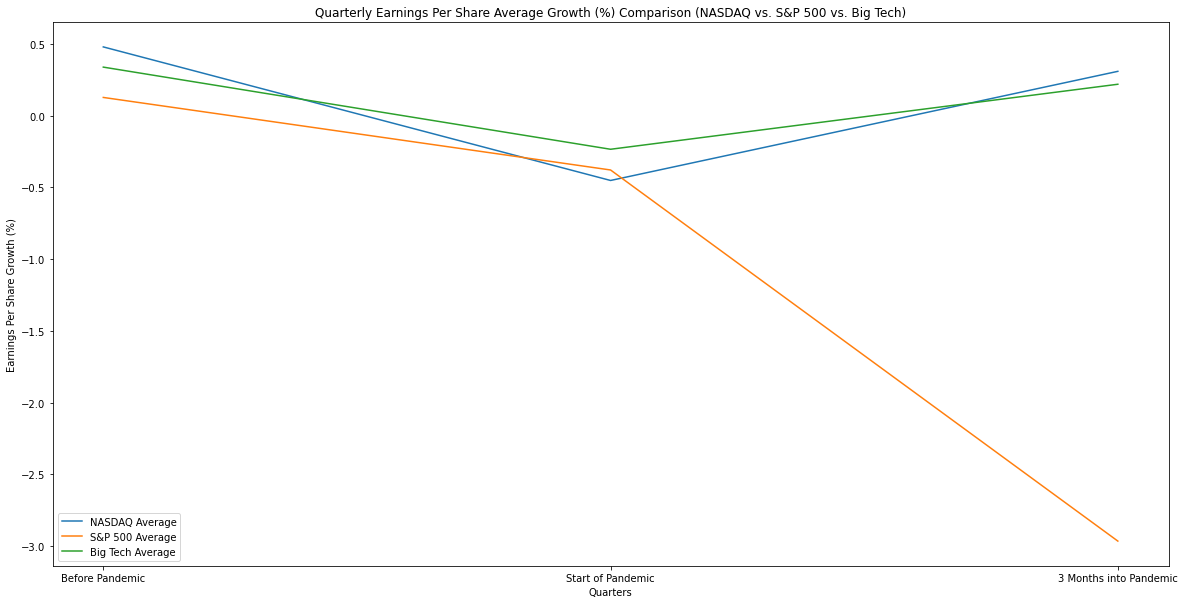

In [70]:
# EPS growth of S&P portfolio vs. EPS growth of Big Tech Companies
# over 3 quarters

# create the average EPS growth values for each quarter for NASDAQ, S&P 500, and Big Tech Companies
nasdaq_eps_values = [clean_nasdaq_df['Q1 EPS Growth'].mean(), clean_nasdaq_df['Q2 EPS Growth'].mean(), 
                     clean_nasdaq_df['Q3 EPS Growth'].mean()]

snp_eps_values = [clean_snp_df['Q1 EPS Growth'].mean(), clean_snp_df['Q2 EPS Growth'].mean(), 
                     clean_snp_df['Q3 EPS Growth'].mean()]

big_tech_eps_values = [big_tech_df['Q1 EPS Growth'].mean(), big_tech_df['Q2 EPS Growth'].mean(), 
                         big_tech_df['Q3 EPS Growth'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_eps_values, label='NASDAQ Average')
plt.plot(quarters, snp_eps_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_eps_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Earnings Per Share Growth (%)')
plt.legend(loc='best')
plt.title('Quarterly Earnings Per Share Average Growth (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('../graphs/eps_growth_comparison.png')
plt.show()

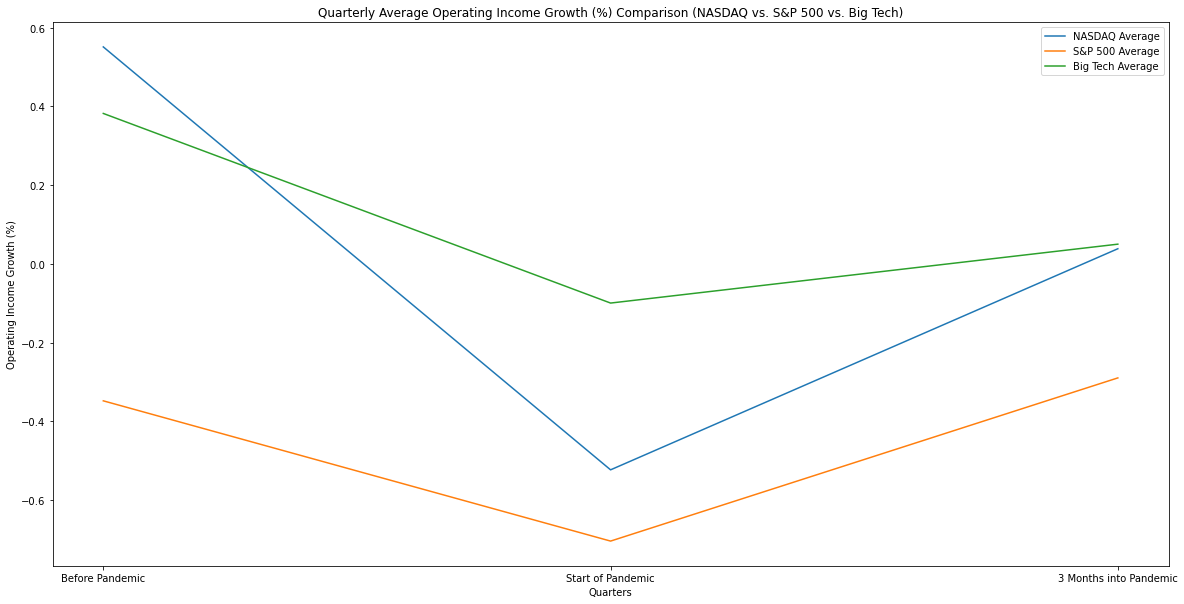

In [69]:
# create the average Operating Income growth values for each quarter for both NASDAQ and S&P 500
nasdaq_op_inc_values = [clean_nasdaq_df['Q1 Op Income Growth'].mean(), clean_nasdaq_df['Q2 Op Income Growth'].mean(), 
                     clean_nasdaq_df['Q3 Op Income Growth'].mean()]

snp_op_inc_values = [clean_snp_df['Q1 Op Inc Growth'].mean(), clean_snp_df['Q2 Op Inc Growth'].mean(), 
                     clean_snp_df['Q3 Op Inc Growth'].mean()]

big_tech_op_inc_values = [big_tech_df['Q1 Op Inc Growth'].mean(), big_tech_df['Q2 Op Inc Growth'].mean(), 
                         big_tech_df['Q3 Op Inc Growth'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_op_inc_values, label='NASDAQ Average')
plt.plot(quarters, snp_op_inc_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_op_inc_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Operating Income Growth (%)')
plt.legend(loc='best')
plt.title('Quarterly Average Operating Income Growth (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('../graphs/op_inc_growth_comparison.png')
plt.show()

In [65]:
# add price changes as percentage for S&P
for index, row in clean_snp_df.iterrows():
    clean_snp_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_snp_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    clean_snp_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

dtale.show(clean_snp_df, ignore_duplicate=True)

In [67]:
# add price changes as percentage for Big Tech
for index, row in big_tech_df.iterrows():
    big_tech_df.loc[index, 'Q1 Price Change'] =  100 * (row['Q1 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    big_tech_df.loc[index, 'Q2 Price Change'] =  100 * (row['Q2 Price'] - row['Q1 Price'])/(row['Q1 Price'])
    big_tech_df.loc[index, 'Q3 Price Change'] =  100 * (row['Q3 Price'] - row['Q2 Price'])/(row['Q2 Price'])

dtale.show(big_tech_df, ignore_duplicate=True)

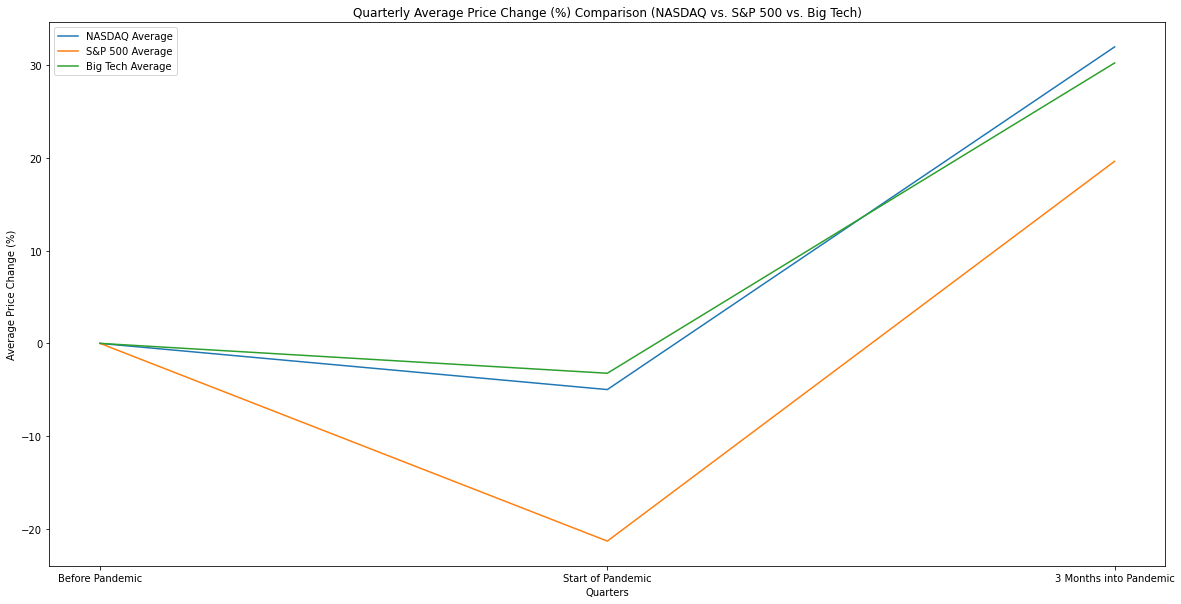

In [68]:
# Price Changes over 3 quarters: NASDAQ vs. S&P 500 vs. Big Tech
nasdaq_price_values = [clean_nasdaq_df['Q1 Price Change'].mean(), clean_nasdaq_df['Q2 Price Change'].mean(), 
                     clean_nasdaq_df['Q3 Price Change'].mean()]

snp_price_values = [clean_snp_df['Q1 Price Change'].mean(), clean_snp_df['Q2 Price Change'].mean(), 
                     clean_snp_df['Q3 Price Change'].mean()]

big_tech_price_values = [big_tech_df['Q1 Price Change'].mean(), big_tech_df['Q2 Price Change'].mean(), 
                         big_tech_df['Q3 Price Change'].mean()]

quarters = ['Before Pandemic', 'Start of Pandemic', '3 Months into Pandemic']

plt.subplots(figsize=(20, 10))
plt.plot(quarters, nasdaq_price_values, label='NASDAQ Average')
plt.plot(quarters, snp_price_values, label='S&P 500 Average')
plt.plot(quarters, big_tech_price_values, label='Big Tech Average')
    
plt.xlabel('Quarters')
plt.ylabel('Average Price Change (%)')
plt.legend(loc='best')
plt.title('Quarterly Average Price Change (%) Comparison (NASDAQ vs. S&P 500 vs. Big Tech)')

plt.savefig('../graphs/price_change_comparison.png')
plt.show()